In [1]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math
import re
from datetime import datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import ast
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

from wordcloud import WordCloud, STOPWORDS

stop_words = nltk.corpus.stopwords.words("english")

sns.set_theme(style="darkgrid")

In [2]:
df_data  = pd.read_csv("Data/PreProData.csv")
df_geo = pd.read_csv("Data/location_geocode.csv")

Text(0.5, 1.0, 'Sentiment Distribution')

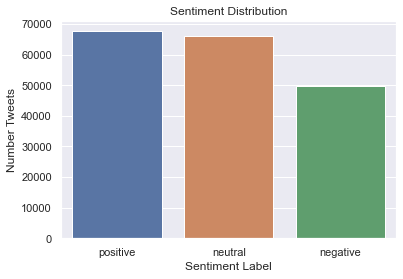

In [3]:
temp = dict(collections.Counter(list(df_data['sentiment_label'])))
p = sns.barplot(x = list(temp.keys()), y = list(temp.values()))
p.set_xlabel("Sentiment Label")
p.set_ylabel("Number Tweets")
p.set_title("Sentiment Distribution")



In [4]:
fig = go.Figure(go.Funnelarea(
    text = list(temp.keys()),
    values = list(temp.values()),
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<AxesSubplot:xlabel='number_words', ylabel='Density'>

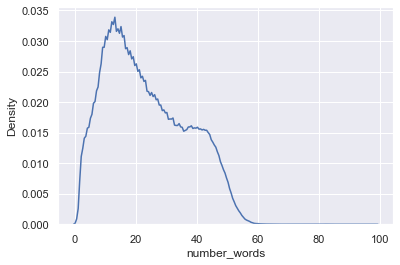

In [5]:
sns.kdeplot(data=df_data['number_words'], bw_adjust= .4)

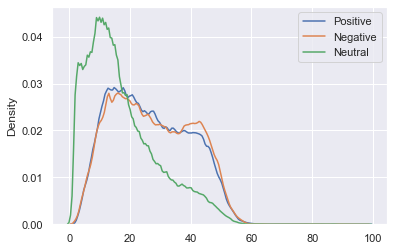

In [6]:
pos_tweets = df_data.loc[df_data['sentiment_label'] == 'positive']['tweet']
neg_tweets = df_data.loc[df_data['sentiment_label'] == 'negative']['tweet']
neu_tweets = df_data.loc[df_data['sentiment_label'] == 'neutral']['tweet']
pos_number_words = [ len([w for w in tw.split()]) for tw in pos_tweets ]
neg_number_words = [ len([w for w in tw.split()]) for tw in neg_tweets ]
neu_number_words = [ len([w for w in tw.split()]) for tw in neu_tweets ]
sns.kdeplot(data=pos_number_words, bw_adjust= .4, label = 'Positive')
sns.kdeplot(data=neg_number_words, bw_adjust= .4, label = 'Negative')
sns.kdeplot(data=neu_number_words, bw_adjust= .4, label = 'Neutral')
plt.legend(['Positive','Negative','Neutral'])
plt.show()



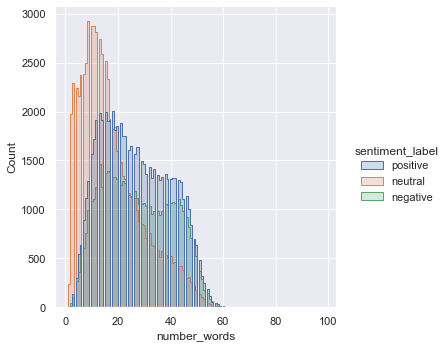

In [7]:
sns.displot(df_data, x = 'number_words', hue = 'sentiment_label', element = 'step')

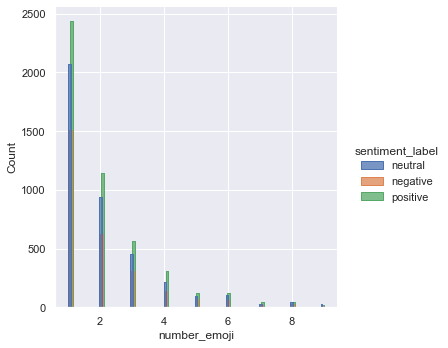

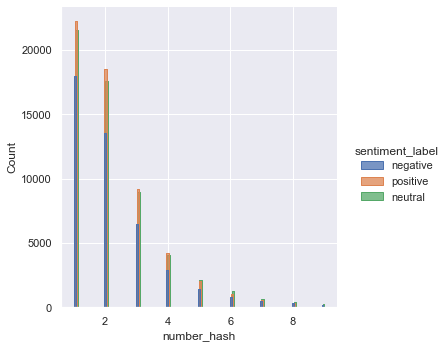

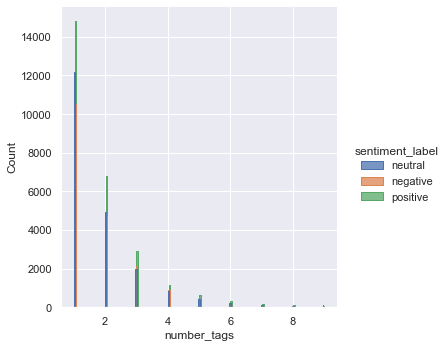

In [8]:
sns.displot(df_data.loc[(df_data['number_emoji'] > 0)].loc[df_data['number_emoji'] < 10], x="number_emoji", hue="sentiment_label",multiple = 'dodge', element = 'step')
sns.displot(df_data.loc[(df_data['number_hash'] > 0)].loc[df_data['number_hash'] < 10], x="number_hash", hue="sentiment_label",  multiple = 'dodge',element = 'step')
sns.displot(df_data.loc[(df_data['number_tags'] > 0)].loc[df_data['number_tags'] < 10], x="number_tags", hue="sentiment_label",  multiple = 'dodge',element = 'step')

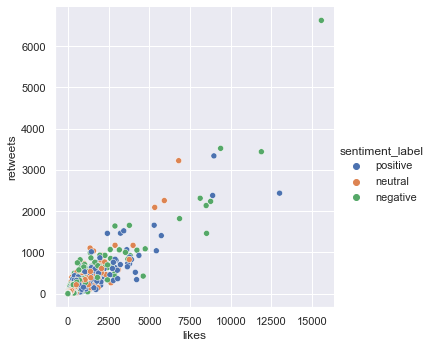

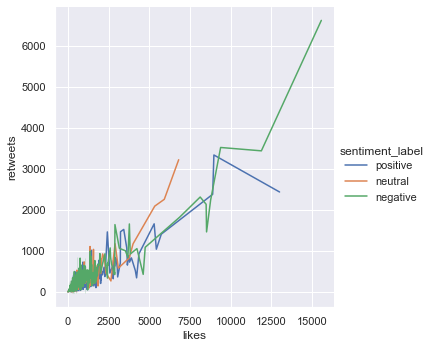

In [9]:
sns.relplot(data = df_data, x="likes", y="retweets", hue="sentiment_label");
sns.relplot(data = df_data, x="likes", y="retweets", hue="sentiment_label",kind = 'line', ci = 'sd');

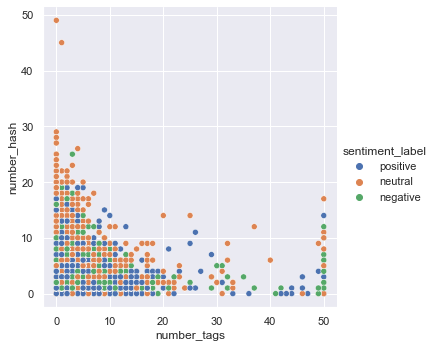

In [10]:
sns.relplot(data = df_data, x="number_tags", y="number_hash", hue="sentiment_label");

We make wordclouds using the raw tweets and also the preprocessed tweets.

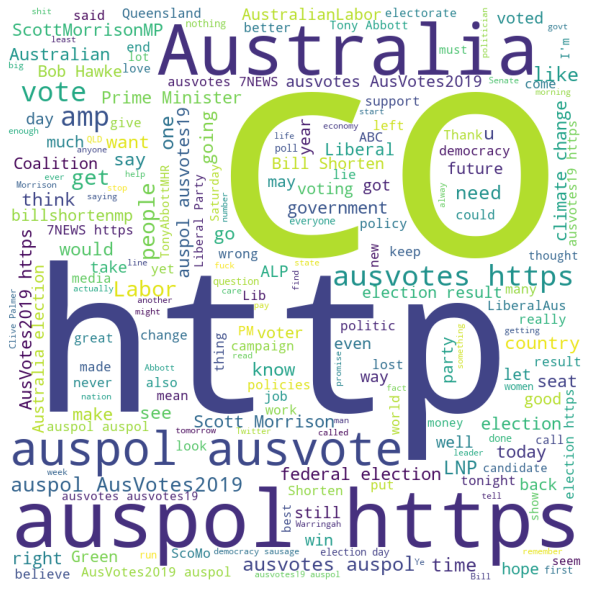

In [11]:
all_words = ""
for s in  list(df_data['tweet']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

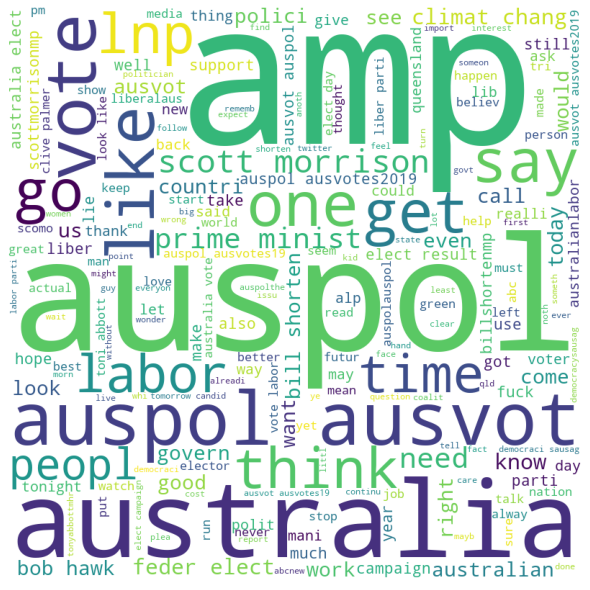

In [12]:
all_words = ""
for s in  list(df_data['tweet_prepro']):
    all_words = all_words+str(s)


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

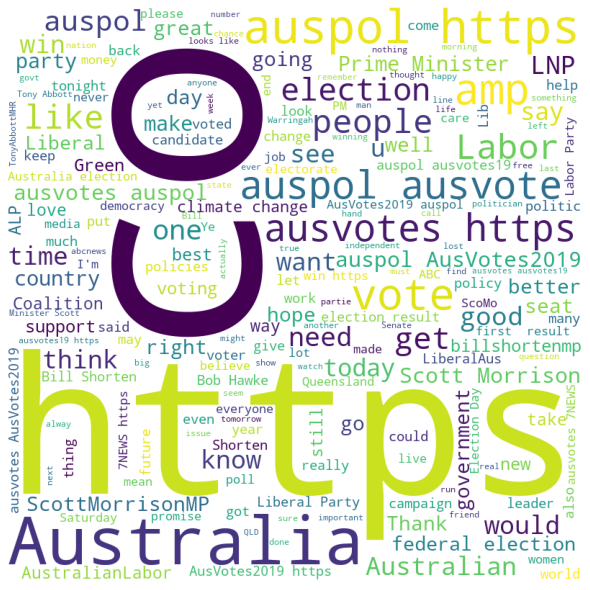

In [13]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'positive'] ['tweet']):
    all_words = all_words+str(s)


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

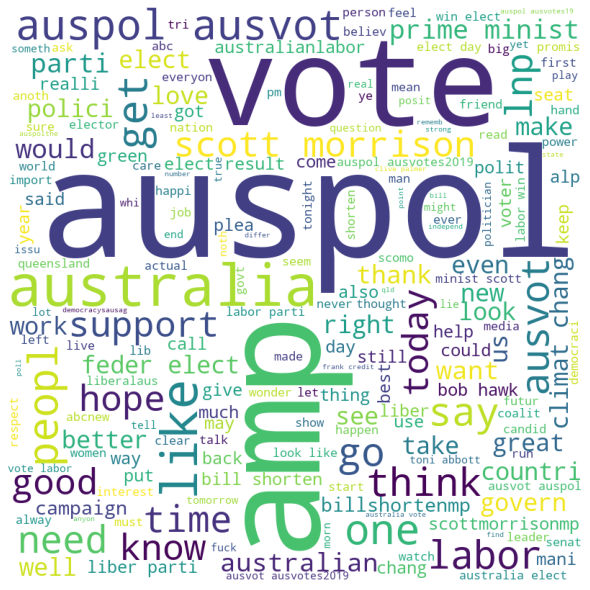

In [14]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'positive'] ['tweet_prepro']):
    all_words = all_words+str(s)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

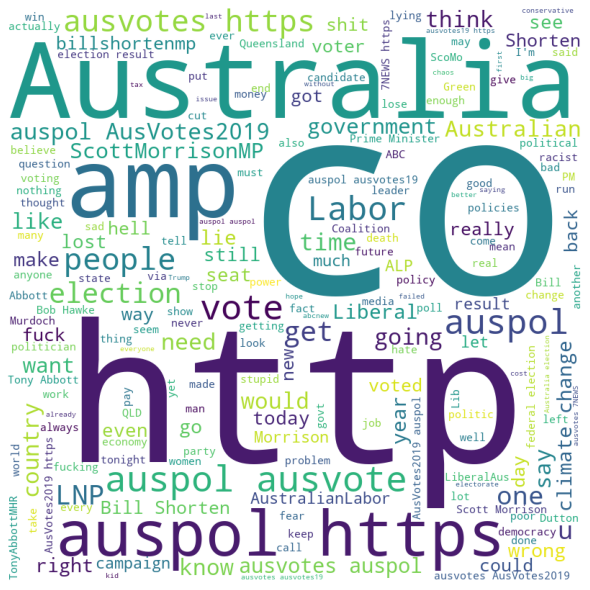

In [15]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'negative'] ['tweet']):
    all_words = all_words+str(s)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

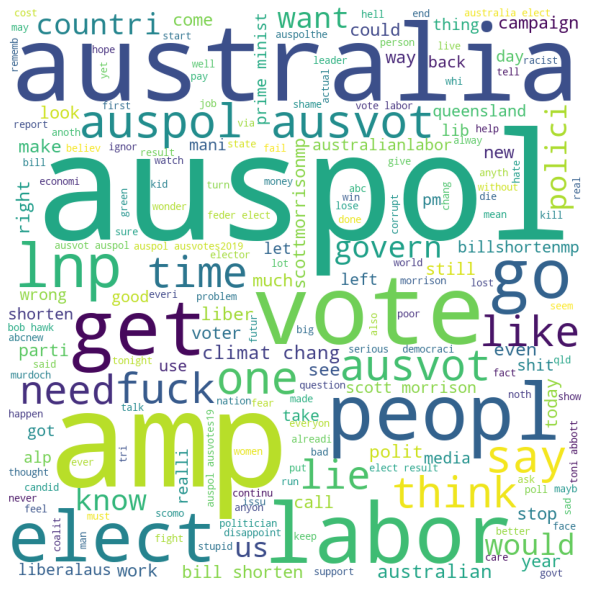

In [16]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'negative'] ['tweet_prepro']):
    all_words = all_words+str(s)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

<AxesSubplot:>

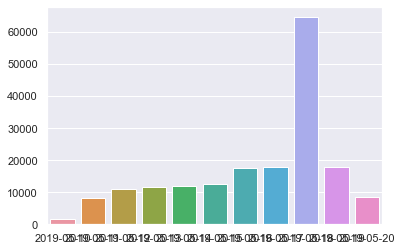

In [17]:
counts = pd.to_datetime(df_data['date']).dt.date.value_counts().sort_index()
sns.barplot(x = counts.index, y = counts.values)

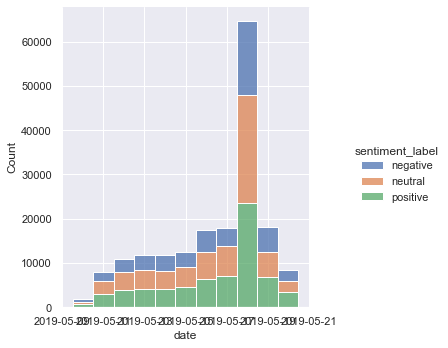

In [18]:
#datetime.strptime(list(df_data['date'])[0], '%Y-%m-%d %H:%M:%S')
df_temp = df_data[['date','sentiment_label']]
df_temp['date'] = pd.to_datetime(df_temp['date']).dt.date
df_temp = df_temp.sort_values('date')
#df_temp = df_temp.sort_values('date')
#df_temp = pd.DataFrame(df_temp.value_counts())
sns.displot(df_temp, x = 'date', hue = 'sentiment_label', multiple = 'stack')

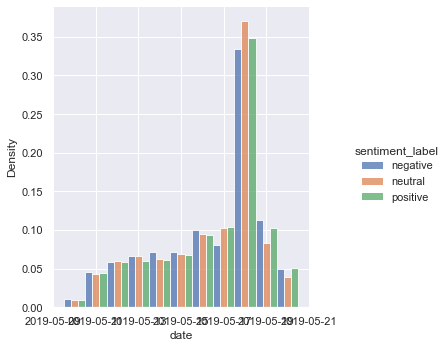

In [19]:
#Proportions
#datetime.strptime(list(df_data['date'])[0], '%Y-%m-%d %H:%M:%S')
df_temp = df_data[['date','sentiment_label']]
df_temp['date'] = pd.to_datetime(df_temp['date']).dt.date
df_temp = df_temp.sort_values('date')
df_temp

#df_temp = df_temp.sort_values('date')
#df_temp = pd.DataFrame(df_temp.value_counts())
sns.displot(df_temp, x = 'date', hue = 'sentiment_label', multiple = 'dodge', common_norm = False, stat= 'density')



In [38]:
users_with_more_tweets = list(df_data['user_id'].value_counts().index[:30])


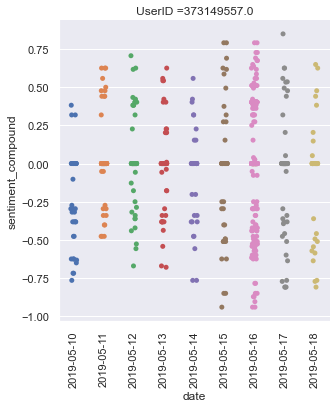

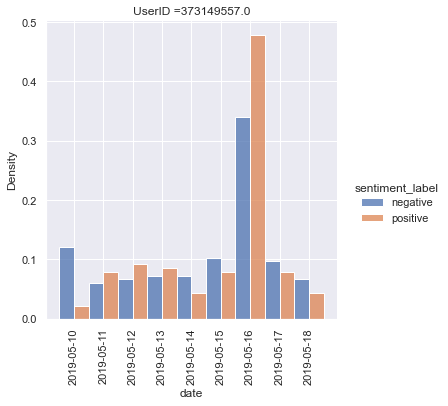

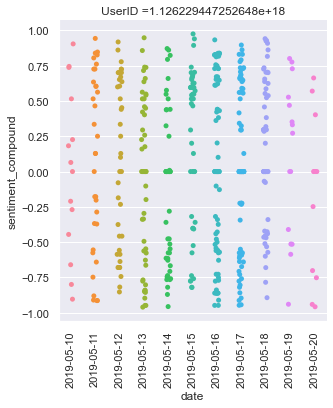

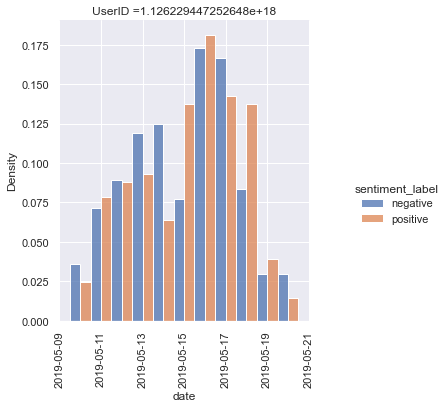

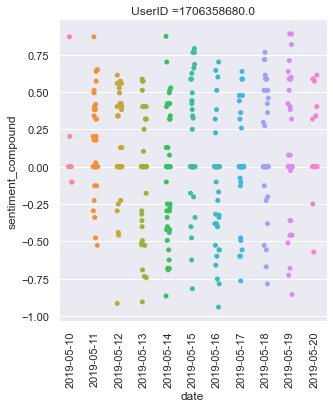

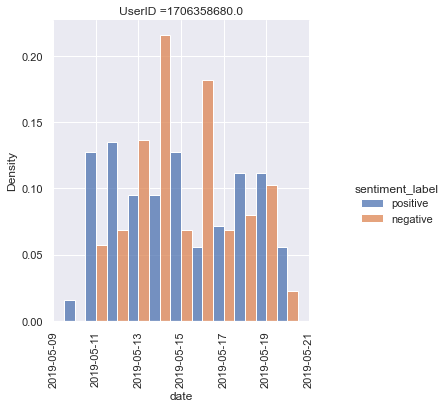

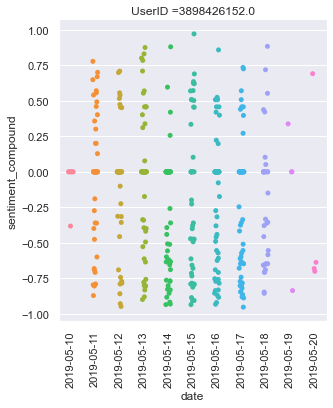

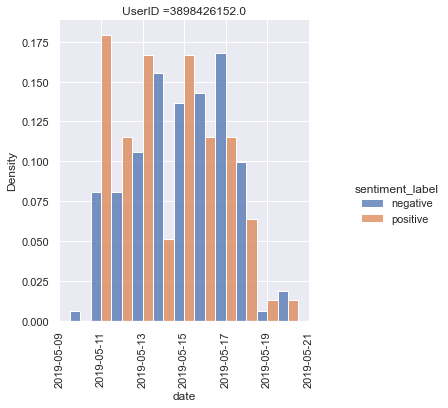

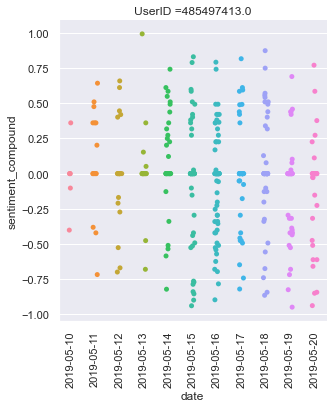

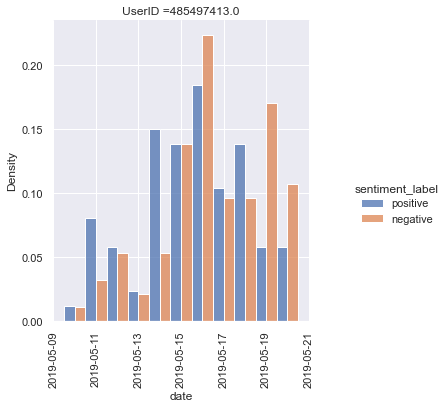

In [78]:
for i in range(5):    
    df_temp = (df_data.loc[df_data['user_id'] == users_with_more_tweets[i]])[['date','sentiment_label','sentiment_compound']]
    df_temp['date'] = pd.to_datetime(df_temp['date']).dt.date
    df_temp = df_temp.sort_values('date')
    sns.catplot(data = df_temp, x = 'date', y = 'sentiment_compound')
    plt.xticks(rotation = 'vertical')
    plt.title('UserID =' + str(users_with_more_tweets[i]))
    dummy_list = ['positive', 'negative']
    df_temp2 = df_temp.copy()
    df_temp2 = df_temp2.loc[df_temp2['sentiment_label'].isin(dummy_list)]
    sns.displot(df_temp2, x = 'date', hue = 'sentiment_label', multiple = 'dodge', common_norm = False, stat= 'density')
    plt.xticks(rotation = 'vertical')
    plt.title('UserID =' + str(users_with_more_tweets[i]))




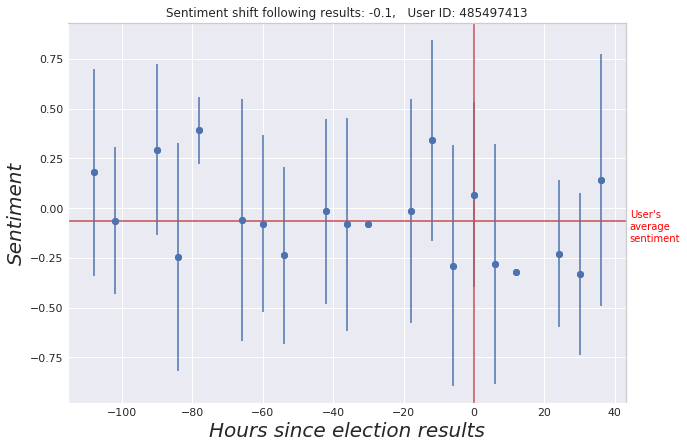

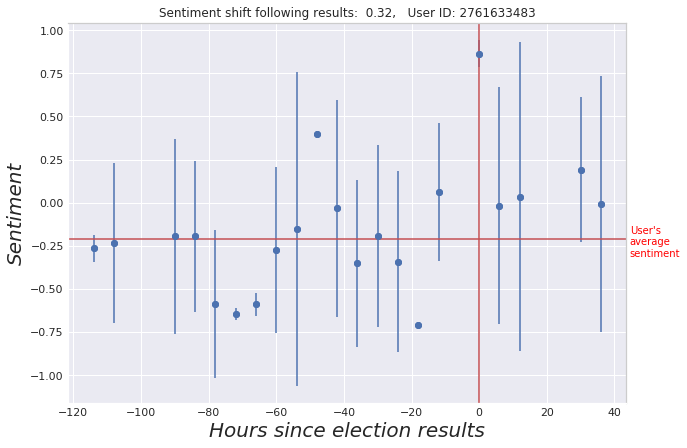

In [3]:
def create_fig():
    plt.figure(figsize=[10,7])
    ax = plt.subplot(111)
    # add more ticks
    # remove tick marks
    ax.xaxis.set_tick_params(size=1)
    ax.yaxis.set_tick_params(size=1)

    # change the color of the top and right spines to opaque gray
    ax.spines['right'].set_color((.8,.8,.8))
    ax.spines['top'].set_color((.8,.8,.8))

    # tweak the axis labels
    xlab = ax.xaxis.get_label()
    ylab = ax.yaxis.get_label()

    xlab.set_style('italic')
    xlab.set_size(20)
    ylab.set_style('italic')
    ylab.set_size(20)
    

top_users = list(df_data['user_id'].value_counts().index[:])


# user_idx=0 corresponds to user with most tweets, and so on.
def plot_sentiment(user_idx):
    election_result_time = np.datetime64('2019-05-18 21:30:00')
    
    temp = df_data[df_data['user_id'] == top_users[user_idx]]
    temp = temp[temp.sentiment_compound != 0]
    temp['date'] = temp['date'].astype('datetime64')
    temp = temp[temp.date >= np.datetime64('2019-05-14')]


    temp['date2'] = (temp.date.astype('datetime64') - election_result_time
                    ).transform(lambda x: 6*int(.5+x / np.timedelta64(6, 'h')))
    temp = temp.sort_values(by='date')
    
    just_after = temp[temp.date >= election_result_time]
    just_after = just_after[just_after.date <= np.datetime64('2019-05-20 21:30:00')]
     
 
  
    mean = temp.sentiment_compound.mean()
    just_after_mean = just_after.sentiment_compound.mean()
 
    means = temp.groupby('date2').mean()
    stds = temp.groupby('date2').std()
    create_fig()
    
    
    plt.axhline(y=mean, color='r', linestyle='-')
    plt.axvline(x=0, color='r', linestyle='-')

    plt.scatter(means.index, means.sentiment_compound)
    plt.errorbar(means.index, means.sentiment_compound, yerr=stds.sentiment_compound, fmt="o")
    plt.xlabel('Hours since election results')
    plt.ylabel('Sentiment')
    plt.text(plt.gca().get_xlim()[1]+1,
             temp.sentiment_compound.mean()-.1,
             "User's\naverage\nsentiment",
             fontsize=10,
            color='red')
    plt.title("Sentiment shift following results: {: .2},   User ID: {}".format(just_after_mean - mean,
                                                                         int(temp['user_id'].iloc[0])))
   



plot_sentiment(4)
plot_sentiment(6)